# Supplementary Information for VLLE Water + Butanol + CPME

*G. Alonso, M. Cartes, A. Mejía*

We import the needed SGTpy modules to build a mixture and model it with SAFT-VR Mie EoS. Here we use the *component* function to load each pure component's SAFT parameters (*i.e.,* $m_{s,i}$, $\sigma_i$, $\varepsilon_i$, $\lambda_r$,$\lambda_a$, $n_{pol}$ and $\mu_{pol}$, the association parameters $\varepsilon_{ii}^{AB}$, $r_{c,ii}^{AB}$, $r_{dc,ii}^{AB}$ and the association scheme sites=[B,P,N]) 

Then each pure component is combined into a mixture by adding them together as c1 + c2 + c3 into the mix variable, where the binary interaction parameters can be loaded (*i.e.,* $k_{ij}$ matrix and $l_{ij}$ matrix) for associative pairs:

$\varepsilon_{ij}=\sqrt{\varepsilon_i \varepsilon_j}\frac{\sqrt[3]{\sigma_i^3 \sigma_j^3}}{\sigma_{ij}^3}(1-k_{ij})$

$\varepsilon_{ij}^{AB}=\sqrt{\varepsilon_{ii}^{AB} \varepsilon_{jj}^{AB}}(1-l_{ij})$

Finally, the mixture is loaded into the EoS with the *saftvrmie* function and the induced associative parameters are manually placed. For more information about how to set up a a mixture with SGTpy and calculate VLLE we refer the reader to the original GitHub documentation and examples page: 

https://github.com/gustavochm/sgtpy

https://github.com/gustavochm/sgtpy/blob/master/examples/

In [2]:
import numpy as np
from sgtpy import component, mixture, saftvrmie
from sgtpy.equilibrium import haz

c1 = component('water',     ms = 1.731, sigma = 2.454, eps = 110.85, lambda_r =  8.308, lambda_a = 6.0, eAB = 1991.07, rcAB = 0.5624, rdAB = 0.4, sites = [0,2,2])
c2 = component('butanol2C', ms = 1.965, sigma = 4.108, eps = 277.89, lambda_r = 10.669, lambda_a = 6.0, eAB = 3300.00, rcAB = 0.2615, rdAB = 0.4, sites = [1,0,1], npol = 1.450, mupol = 1.661)
c3 = component('cpme',      ms = 2.325, sigma = 4.136, eps = 343.91, lambda_r = 14.155, lambda_a = 6.0,                                           sites = [0,0,1], npol = 1.920, mupol = 1.270)

mix = c1 + c2 + c3
mix.kij_saft(np.array([[ 0,        -0.00736,    -0.01606 ],
                       [-0.00736,   0,           0.00130 ],
                       [-0.01606,   0.00130,     0 ]]))
mix.lij_saft(np.array([[0,         -0.00737,     0],
                       [-0.00737,   0,           0],
                       [0,          0,           0]]))

eos = saftvrmie(mix)
eos.eABij[2,0], eos.eABij[0,2] = c1.eAB/2, c1.eAB/2
eos.eABij[2,1], eos.eABij[1,2] = c2.eAB/2, c2.eAB/2
eos.rcij[2,0],  eos.rcij[0,2]  = 2.646 * 1e-10, 2.646 * 1e-10
eos.rcij[2,1],  eos.rcij[1,2]  = 1.774 * 1e-10, 1.774 * 1e-10         

# Phase equilibria initialization

We now calculate the VLLE of the two binary mixtures (*i.e.,* {Water(1) + Butanol(2)} and {Water(1) + CPME(3)}) that serve as initial and final points of the three-phase line with the *haz* function.

*haz* function normally performs an isobaric-isothermic multiflash calculation using as initial guesses the composition of the aqueous ($x_0$), organic ($w_0$) and vapor ($y_0$) phases. However, since we are inputting binary compositions the function automatically identifies that only pressure needs to be fixed and finds the temperature and composition of the binary heteroazeotropes. The stability of the phases are automatically checked using the Gibbs tangent plane criterion and the function reports a "success" when it passes the check. 


In [3]:
P = 101325
# --------------------------------------------------
# Water (1) + Butanol (2) VLLE at P = 101325
# --------------------------------------------------
T = 360
x0 = np.array([0.99, 0.01, 0])
w0 = np.array([0.60, 0.40, 0])
y0 = np.array([0.80, 0.20, 0])

sol=haz(x0, w0, y0, T, P, eos, full_output=True)

T12 = sol.T
x12 = sol.X[0]
w12 = sol.X[1]
y12 = sol.X[2]
r12 = sol.success
# --------------------------------------------------
# Water (1) + CPME (3) VLLE at P = 101325
# --------------------------------------------------
T = 360
x0 = np.array([0.99, 0, 0.01])
w0 = np.array([0.01, 0, 0.99])
y0 = np.array([0.60, 0, 0.40])

sol= haz(x0, w0, y0, T, P, eos, full_output=True)

T13 = sol.T
x13 = sol.X[0]
w13 = sol.X[1]
y13 = sol.X[2]
r13 = sol.success

# --------------------------------------------------

print ("                                 T / K        x1     x2       w1     w2       y1     y2   success")
print ("____________________________________________________________________________________________________")
print (" Water(1) + Butanol(2) [VLLE] -> {:.2f}     {:.3f}  {:.3f}    {:.3f}  {:.3f}    {:.3f}  {:.3f}  {} ".format(T12, x12[0], x12[1], w12[0], w12[1], y12[0], y12[1], r12))
print (" Water(1) + CPME(3)    [VLLE] -> {:.2f}     {:.3f}  {:.3f}    {:.3f}  {:.3f}    {:.3f}  {:.3f}  {} ".format(sol.T,sol.X[0,0], sol.X[0,2],sol.X[1,0], sol.X[1,2],sol.X[2,0], sol.X[2,2], r13))
print ("____________________________________________________________________________________________________")


/Users/gerardalonso/.Python_Modules/SGTPy/sgtpy/equilibrium/hazt.py:118: UserWarning: Global mixture is a binary mixture, updating temperature
  warn('Global mixture is a binary mixture, updating temperature')


                                 T / K        x1     x2       w1     w2       y1     y2   success
____________________________________________________________________________________________________
 Water(1) + Butanol(2) [VLLE] -> 367.21     0.943  0.057    0.613  0.387    0.775  0.225  True 
 Water(1) + CPME(3)    [VLLE] -> 356.15     0.998  0.002    0.068  0.932    0.524  0.476  True 
____________________________________________________________________________________________________


### Calculate the three phase line

Then, we loop in temperature from the {Water(1) + Butanol(2)} binary to the {Water(1) + CPME(3)} binary updating the $T_i$ and the initial $y_{i}$ composition linearly from the 1+2 to the 1+3 mixture, so that:

$y_{i} = y_{12} + (y_{13}-y_{12})*\frac{i}{n_{points}}$

$T_{i} = T_{12} + (T_{13}-T_{12})*\frac{i}{n_{points}}$      (this is done with the *np.linspace* function)

Then, we run the *haz* function to perform the previously explained isothermic-isobaric multiflash calculation. In ternary mixtures the phase stability is informed in the variable *tetha*, which reports a stable phase when the three *tetha* values from L1, L2 and V phases are equal to zero. If all three *tethas* are zero we consider the VLLE point converged and take its composition as initial guesses for the next point in the iteration. 

If any *tetha* is different from zero we try to improve the initial guess by extrapolation of the composition based on the shape of the $x, y$ and $w$ vs. $T$ trends instead of using the previously converged one. To that end, we fit the full set of previously converged points to an 8th order polynomial and extract the new initial guess from it. A new *haz* test is made expecting convergence. If it does not converge, the value is reported with the (tetha != 0). 

We recomend starting the iteration from the most well-behaved binary so that many stable points are predicted and the extrapolation has de highest possible quality. If necessary, more than 51 points can be calculated.

In [4]:
P = 101325
npoints = 51

T = np.linspace(T12, T13, npoints) 
x = np.zeros((npoints,3))
w = np.zeros((npoints,3))
y = np.zeros((npoints,3))

x[0], x[-1] = x12, x13
w[0], w[-1] = w12, w13
y[0], y[-1] = y12, y13

# Start Looping from binary to binary
print ("   T / K        x1     x2       w1     w2       y1     y2    tethas")
print ("________________________________________________________________________")
print ("0  {:.2f}     {:.3f}  {:.3f}    {:.3f}  {:.3f}    {:.3f}  {:.3f}  BIN (water + butanol)".format(T[0], x[0,0], x[0,1], w[0,0], w[0,1], y[0,0], y[0,1]))
for i in range(1, npoints-1):
    y[i] = y[0]+(y[-1]-y[0])*(i/npoints)
    sol = haz(x[i-1], w[i-1], y[i], T[i], P, eos,  full_output=True)  
    
    # If haz does not converge, and there is enough data to fit a 8th order polynomial and extrapolate next initial guess: try it
    if np.any(sol.tetha != 0) and i > 10:
        Tpoly = np.array([T[i]**8, T[i]**7, T[i]**6, T[i]**5, T[i]**4, T[i]**3, T[i]**2, T[i], 1])
        x1, x2 = np.sum(np.polyfit(T[:i], x[:i,0], 8) * Tpoly), np.sum(np.polyfit(T[:i], x[:i,1], 8) * Tpoly)
        x0  = np.array([x1, x2 ,1-x1-x2 ])
        w1, w2 = np.sum(np.polyfit(T[:i], w[:i,0], 8) * Tpoly), np.sum(np.polyfit(T[:i], w[:i,1], 8) * Tpoly)
        w0  = np.array([w1, w2 ,1-w1-w2 ])
        y1, y2 = np.sum(np.polyfit(T[:i], y[:i,0], 8) * Tpoly), np.sum(np.polyfit(T[:i], y[:i,1], 8) * Tpoly)
        y0  = np.array([y1, y2 ,1-y1-y2 ])

        sol=haz(x0, w0, y0, T[i], P, eos,  full_output=True) 
        
    x[i]= sol.X[0]
    w[i]= sol.X[1]
    y[i]= sol.X[2]
    
    print (i," {:.2f}     {:.3f}  {:.3f}    {:.3f}  {:.3f}    {:.3f}  {:.3f}   {}|{}|{}".format(T[i], x[i,0], x[i,1], w[i,0], w[i,1], y[i,0], y[i,1],sol.tetha[0],sol.tetha[1],sol.tetha[2]))
    
print (npoints-1, " {:.2f}     {:.3f}  {:.3f}    {:.3f}  {:.3f}    {:.3f}  {:.3f}   BIN (water + cpme) ".format(T[-1], x[-1,0], x[-1,1], w[-1,0], w[-1,1], y[-1,0], y[-1,1]))
print ("________________________________________________________________________")
           

   T / K        x1     x2       w1     w2       y1     y2    tethas
________________________________________________________________________
0  367.21     0.943  0.057    0.613  0.387    0.775  0.225  BIN (water + butanol)
1  366.98     0.944  0.056    0.608  0.390    0.769  0.222   0.0|0.0|0.0
2  366.76     0.944  0.055    0.603  0.393    0.763  0.218   0.0|0.0|0.0
3  366.54     0.945  0.054    0.598  0.396    0.757  0.215   0.0|0.0|0.0
4  366.32     0.946  0.053    0.593  0.398    0.751  0.212   0.0|0.0|0.0
5  366.10     0.947  0.052    0.587  0.401    0.746  0.209   0.0|0.0|0.0
6  365.88     0.948  0.051    0.582  0.403    0.740  0.206   0.0|0.0|0.0
7  365.66     0.949  0.051    0.576  0.406    0.734  0.203   0.0|0.0|0.0
8  365.44     0.950  0.050    0.571  0.408    0.728  0.199   0.0|0.0|0.0
9  365.22     0.950  0.049    0.565  0.411    0.723  0.196   0.0|0.0|0.0
10  364.99     0.951  0.048    0.559  0.413    0.717  0.193   0.0|0.0|0.0
11  364.77     0.952  0.047    0.553  0.415   

/Users/gerardalonso/miniforge3/envs/saft/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/gerardalonso/miniforge3/envs/saft/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/gerardalonso/miniforge3/envs/saft/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/gerardalonso/miniforge3/envs/saft/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/gerardalonso/miniforge3/envs/saft/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, 

## VLLE plotting

Once the VLLE curve is found, we plot de VLLE in a ternary diagram using the *ternary* module coupled to *matplotlib*.

The blue, green and red curves correspond to the water, organic and vapor phase, respectively. Some tie-lines connecting the three phases are displayed in dotted lines.

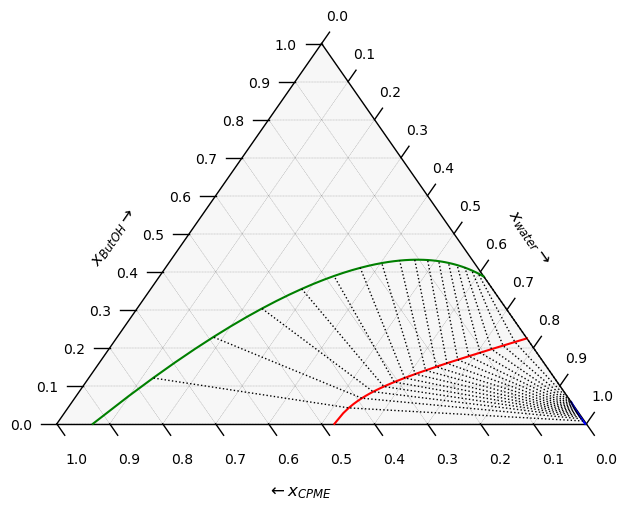

In [6]:
import matplotlib.pyplot as plt
import ternary

# Prepare the tiangular plot and the grid
fig = plt.figure(figsize = (12,5), constrained_layout=True)
ax3 = fig.add_subplot(121)
tax = ternary.TernaryAxesSubplot(ax=ax3, scale = 1.0)
tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=0.1, linewidth=0.2)

# Set ticks
tax.ticks(clockwise=True, multiple=0.1, linewidth=1, offset = 0.03,tick_formats='%.1f')

#Set component labels
tax.right_axis_label(r"$x_{water}\rightarrow$", fontsize=12, offset = 0.15)
tax.left_axis_label(r"$x_{ButOH} \rightarrow$", fontsize=12, offset = 0.15)
tax.bottom_axis_label(r"$\leftarrow x_{CPME}$", fontsize=12, offset = 0.15)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax._redraw_labels()
ternary.plt.axis('off')

# plot the VLLE results obtanined by SAFT-VR mie in the previous code-block
tax.plot(x, color = 'b')
tax.plot(w, color = 'g')
tax.plot(y, color = 'r')

# Plot some equispaced Tie-Lines (the number of tie-lines can be increased by modifying the nties variable)
nties=15
for i in range(0,len(T),int(len(T)/nties)):
    tax.plot([x[i], y[i], w[i]], linestyle=':', color='k', linewidth=1)
    
plt.show()